# Retrieval Test

In [1]:
# Libraries
import faiss
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import json
from PIL import Image

from preprocessing import preprocessing_dinov2

In [2]:
# FAISS Index
index = faiss.read_index('BME_faiss.index')
index.ntotal

768

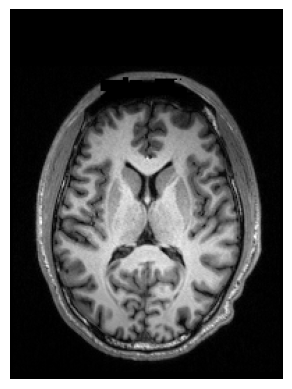

In [31]:
test = nib.load('/home/kdh/code/BME_Capstone1/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()
test = preprocessing_dinov2(test[:, 90, :])
plt.imshow(test.permute(1,2,0))
plt.axis('off')
plt.savefig('/home/kdh/code/BME_Capstone1/1.png', bbox_inches='tight', pad_inches=0)

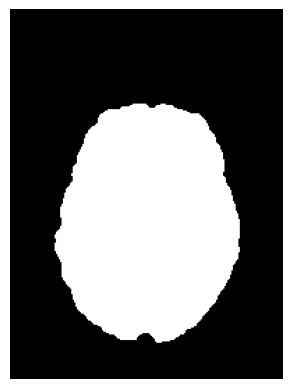

In [34]:
test = nib.load('/home/kdh/code/BME_Capstone1/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz').get_fdata()
test = preprocessing_dinov2(test[:, 90, :])
plt.imshow(test.permute(1,2,0))
plt.axis('off')
plt.savefig('/home/kdh/code/BME_Capstone1/4.png', bbox_inches='tight', pad_inches=0)

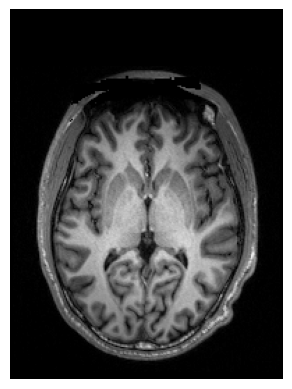

In [32]:
import torchvision.transforms.functional as TF
t = TF.to_tensor(Image.open('/home/kdh/code/BME_Capstone1/FAISS/A00028185_axial_97.png'))
t = t / t.max()# * 255
t = preprocessing_dinov2(t.squeeze(0))
plt.imshow(t.permute(1,2,0))
plt.axis('off')
plt.savefig('/home/kdh/code/BME_Capstone1/2.png', bbox_inches='tight', pad_inches=0)

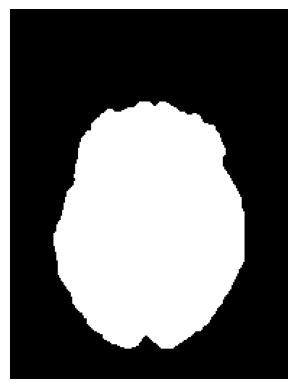

In [33]:
t = TF.to_tensor(Image.open('/home/kdh/code/BME_Capstone1/FAISS/A00028185_axial_97_mask.png'))
plt.imshow(t[0], cmap='gray')
plt.axis('off')
plt.savefig('/home/kdh/code/BME_Capstone1/3.png', bbox_inches='tight', pad_inches=0)

In [8]:
dino = torch.hub.load('facebookresearch/dinov2', "dinov2_vits14_reg").cuda()
query = dino.forward_features(test.unsqueeze(0).cuda().float())['x_norm_clstoken'].detach().cpu().numpy()

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


## Retrieve 3 Sample

In [9]:
dist, idx = index.search(query, 3)

In [12]:
for d, i in zip(dist[0], idx[0]):
    print(f"Index : {i}\tDist : {d}")

Index : 27	Dist : 47.148399353027344
Index : 353	Dist : 68.50519561767578
Index : 681	Dist : 69.40454864501953


In [13]:
with open('faiss_idx.json', 'r') as f:
    table = json.load(f)

retrieved = []
for i in idx[0]:
    retrieval = Image.open('./FAISS/' + table[str(i)] + '.png')
    retrieved.append(retrieval)

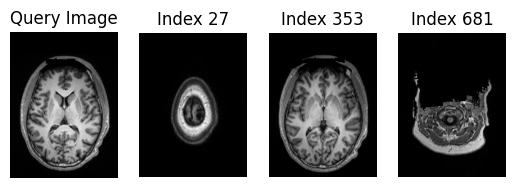

In [17]:
plt.subplot(1, 4, 1)
plt.imshow(test.permute(1,2,0))
plt.title('Query Image')
plt.axis('off')

for i, img in enumerate(retrieved):
    plt.subplot(1, 4, i+2)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Index {idx[0][i]}")

In [2]:
from model.modeling.retrieval import Retrieval

r = Retrieval(faiss_index='/home/kdh/code/BME_Capstone1/BME_faiss.index',
              faiss_json="/home/kdh/code/BME_Capstone1//faiss_idx.json",)

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [3]:
test = nib.load('/home/kdh/code/BME_Capstone1/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()[:, 90, :]
test.shape

(256, 192)

In [4]:
import torchvision
test = torchvision.transforms.ToTensor()(test)
test.shape

torch.Size([1, 256, 192])

In [6]:
retrieval = r(test.squeeze(0), n=5)
retrieval

{'image': [tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]),
  tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.00

In [10]:
retrieval['image'][0].shape

torch.Size([3, 256, 192])